# Financial Analysis - Sentiment Analysis, **NLP**

Natural Language Processing 

works by converting word text into numbers, then use these numbers to train a ML model to make predictions.

Labels: 0= negative, 1= positive

In [1]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  NLP module libraries
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.

In [3]:
# stock_df  for SENTIMENT df

stock_sentiment_df = pd.read_csv('stock_sentiment.csv')
stock_sentiment_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [5]:
# check for null values
stock_sentiment_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [6]:
# number of unique elements
stock_sentiment_df.nunique() 

Text         5791
Sentiment       2
dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

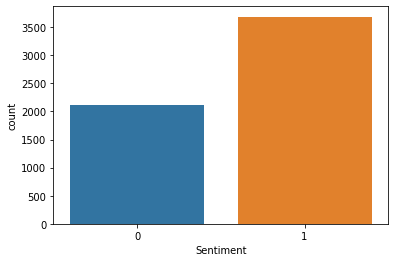

In [28]:
data = stock_sentiment_df['Sentiment']
sns.countplot(data )

## Data Cleaning (remove punctuation)

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
Test = '$I love AI & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [12]:
Test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed[0:14] 

['G', 'o', 'o', 'd', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'b']

In [13]:
# string method JOIN
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

In [14]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [19]:
# original stock_sentiment_df  Series 'Text'
#  apply the function remove_punc to df

# Let's remove punctuations from our dataset 
stock_sentiment_df['Text Without Punctuation'] = stock_sentiment_df['Text'].apply(remove_punc)
stock_sentiment_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [23]:
stock_sentiment_df['Text'][5787] 

'#Gold prices slip below Rs 46,000 as #investors book profits amid #coronavirus-led #recession fears https://t.co/fSylAJrUqv'

In [24]:
stock_sentiment_df['Text Without Punctuation'][5787] 

'Gold prices slip below Rs 46000 as investors book profits amid coronavirusled recession fears httpstcofSylAJrUqv'

## Data Cleaning (stop words)

In [29]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap',
# 'co','day','user','stock','today','week','year', 'https'])
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap',
                   'co','day','user','stock','today','week','year','https'])


In [51]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [52]:
# apply pre-processing to the text column
stock_sentiment_df['Text Without Punc & Stopwords'] = stock_sentiment_df['Text Without Punctuation'].apply(preprocess)

In [53]:
stock_sentiment_df['Text'][0] 

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [54]:
stock_sentiment_df['Text Without Punc & Stopwords'][0] 

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [55]:
stock_sentiment_df.tail() 

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip rs investors book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...
5790,"#Sensex, #Nifty climb off day's highs, still u...",1,Sensex Nifty climb off days highs still up 2 K...,"[sensex, nifty, climb, days, highs, still, key...",sensex nifty climb days highs still key factor...


## Plot **WordCloud**

In [56]:
# join the words into a string
stock_sentiment_df['Text Without Punc & Stopwords Joined'] = stock_sentiment_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

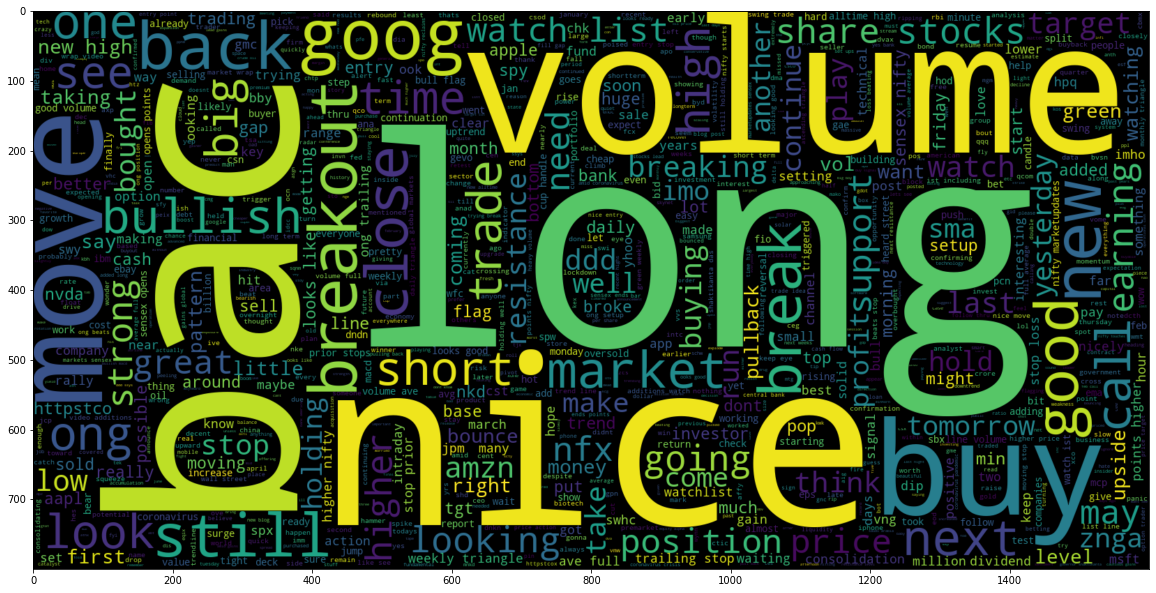

In [57]:
# plot the word cloud for text with positive sentiment

plt.figure(figsize = (20, 20)) 
wc = WordCloud(
    max_words = 1000 , 
    width = 1600 , 
    height = 800).generate(" ".join(stock_sentiment_df[stock_sentiment_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))

plt.imshow(wc, interpolation = 'bilinear');
#

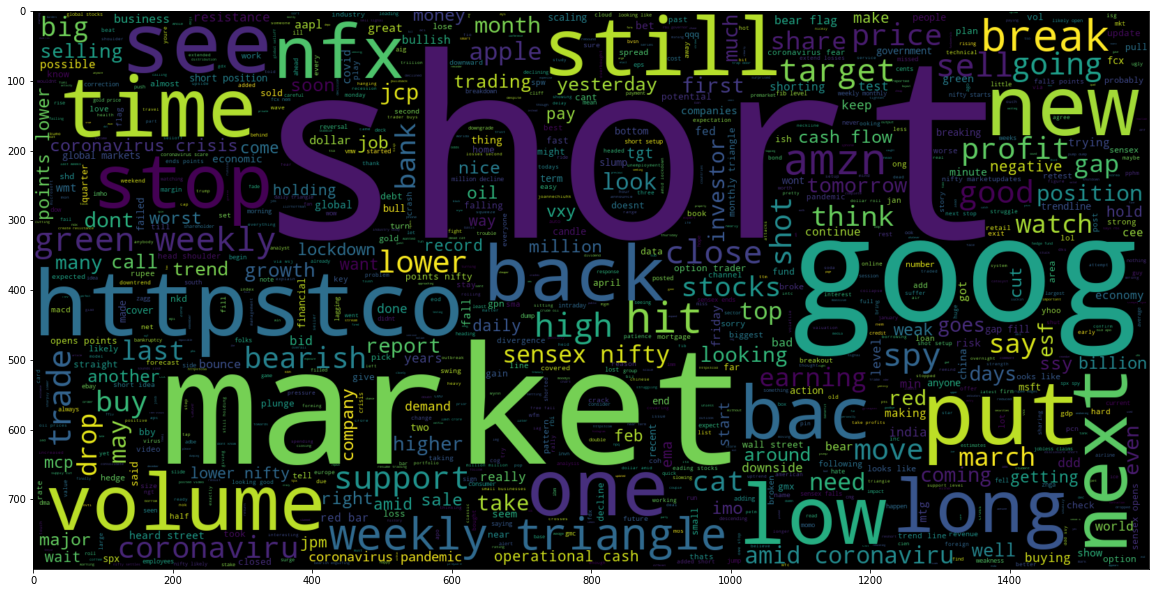

In [60]:
# plot the word cloud for text with negative sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(
    max_words = 1000 , 
    width = 1600 , 
    height = 800).generate(" ".join(
    stock_sentiment_df[stock_sentiment_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))

plt.imshow(wc, interpolation = 'bilinear');

In [62]:
# stock_sentiment_df.head() 

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


## Visualize Clean Datasets

In [63]:
nltk.word_tokenize(stock_sentiment_df['Text Without Punc & Stopwords Joined'][0]) 

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [64]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in stock_sentiment_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)


The maximum number of words in any document is: 20


In [68]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_sentiment_df['Text Without Punc & Stopwords Joined'] ]
tweets_length[0:10]

[14, 6, 7, 1, 0, 1, 8, 13, 8, 4]

In [78]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50, title="Tweet Lengths", 
                   )
fig.layout.template = 'plotly_dark'
fig.show()

## Tokenization

- tokenizer allows for vectorize text corpus, turning words into a sequence of integers

In [81]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stock_sentiment_df['Text Without Punc & Stopwords']: 
    for j in i:
        list_of_words.append(j)

In [84]:
list_of_words[:5] 

['kickers', 'watchlist', 'xide', 'tit', 'soq']

In [85]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [86]:
# split the data into test and train 
X = stock_sentiment_df['Text Without Punc & Stopwords']
y = stock_sentiment_df['Sentiment'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [89]:
# train shape
print('X_train shape: ',X_train.shape)

# test shape
print('X_test shape: ', X_test.shape) 

X_train shape:  (5211,)
X_test shape:  (580,)


In [90]:
# train
X_train

5540    [sensex, falls, points, nifty, markets, give, ...
1858    [dont, see, spike, like, one, huge, green, bar...
3033    [cancer, trial, sabotage, whos, going, jail, f...
5383    [margotpatrick, coronabonds, says, jonsindreu,...
1998    [higher, bid, offering, coming, look, recent, ...
                              ...                        
5496    [sensex, nifty, likely, open, higher, httpstco...
3053    [znga, zynga, closes, timonium, video, game, s...
2428                 [znga, looking, continue, add, well]
5083    [fund, provide, financing, companies, hit, nov...
4183    [broke, held, lead, higher, since, slide, bega...
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [91]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train) 

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test) 

In [93]:
train_sequences[:5]  # this is the gold of NLP tokenization

[[20, 465, 45, 23, 50, 437, 228, 134, 3617, 2480],
 [86, 21, 768, 3, 22, 200, 46, 483, 599, 1304, 484, 979, 1122, 3618],
 [1890,
  2481,
  3619,
  2482,
  36,
  1891,
  81,
  641,
  3620,
  3621,
  865,
  642,
  438,
  1891,
  24,
  97],
 [3622, 1892, 135, 1525, 3623, 1892, 275, 3624, 3625, 2483, 3626, 2484],
 [16, 181, 980, 93, 78, 223, 174, 340, 75, 439, 3627, 2485]]

In [94]:
test_sequences[:5] # this is the gold of NLP tokenization

[[759, 10, 138, 56, 217, 5, 2143, 150, 17],
 [2294, 62, 1291],
 [227, 117, 680, 104, 5428, 1419, 88, 934, 180, 31, 126],
 [1211, 2392, 246, 7, 312, 52],
 [20, 505, 45, 16, 23, 1020, 50, 138, 14, 249, 20, 23, 299]]

In [114]:
print("The encoding for document [1:2]\n", '\t',X_train[1:2]) # "\n is: ",train_sequences[1]
print("Training seq:   ",train_sequences[1]) 

The encoding for document [1:2]
 	 1858    [dont, see, spike, like, one, huge, green, bar...
Name: Text Without Punc & Stopwords, dtype: object
Training seq:    [86, 21, 768, 3, 22, 200, 46, 483, 599, 1304, 484, 979, 1122, 3618]


In [96]:
# Add padding to training and testing
#  adding zeros to set fix length for all text
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post') 

In [97]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc) 

The padded encoding for document: 1  is: [  20  465   45   23   50  437  228  134 3617 2480    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [  86   21  768    3   22  200   46  483  599 1304  484  979 1122 3618
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [1890 2481 3619 2482   36 1891   81  641 3620 3621  865  642  438 1891
   24   97    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [98]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2) 

In [99]:
print('y_train_cat shape: ',y_train_cat) 
print('y_test_cat shape: ',y_test_cat)

y_train_cat shape:  [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
y_test_cat shape:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [100]:
y_train_cat

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [101]:
# change padding to 15
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

## **Embedding Layer**

embedding layers learn low-dimensional continuous representation of discrete input variables. 
- 100,000 unique values to train, with embedding layer, specify the number of low-dimensional features that you need to represent the input data, say 200. 
- the embedding layer learns to represent 100,000 variables with the 200 (similar to Principal Component Analysis (PCA) or Autoencoders)

In [115]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [116]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 14s 110ms/step - loss: 0.5776 - acc: 0.6941 - val_loss: 0.5277 - val_acc: 0.7411
Epoch 2/2
131/131 [==============================] - 14s 108ms/step - loss: 0.2981 - acc: 0.8774 - val_loss: 0.4893 - val_acc: 0.7613


## Assess Trained Model Performance

![](confusion-matrix.png)

In [118]:
# make prediction
pred = model.predict(padded_test) 

In [119]:
# make prediction
prediction = []
for i in pred:
    prediction.append(np.argmax(i))

In [120]:
# list containing original values
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

In [121]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7413793103448276

<AxesSubplot:>

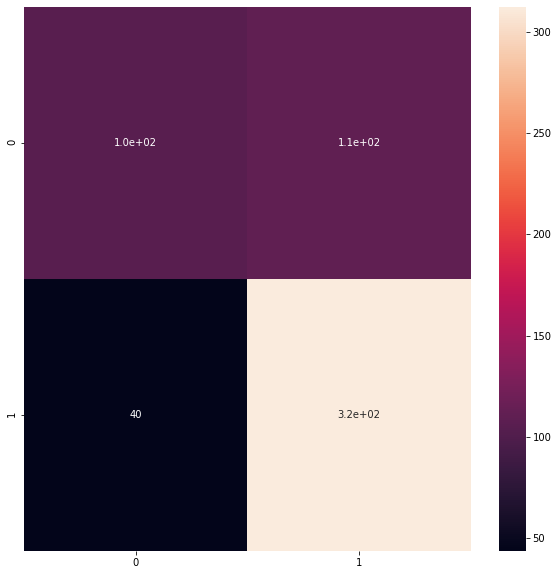

In [136]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
plt.figure(figsize=(10,10)) 
sns.heatmap(cm, annot = True, robust=True, linecolor='white') #fmt='10g',

pretrained BERT model for sentiment analysis prediction